<a href="https://colab.research.google.com/github/KumarADK/Random_forest_classifier/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# Function to generate water data based on usage category
def generate_water_samples(label, n):
    data = pd.DataFrame()

    if label == 'Drinking':
        data['pH'] = np.random.uniform(6.8, 7.5, n)
        data['Turbidity'] = np.random.uniform(0.1, 2.5, n)
        data['Dissolved_Oxygen'] = np.random.uniform(7, 12, n)
        data['Conductivity'] = np.random.uniform(100, 400, n)
        data['TDS'] = np.random.uniform(100, 300, n)
        data['Hardness'] = np.random.uniform(50, 150, n)
        data['Nitrate'] = np.random.uniform(0.1, 5.0, n)
        data['BOD'] = np.random.uniform(1.0, 2.5, n)

    elif label == 'Bathing':
        data['pH'] = np.random.uniform(6.5, 8.5, n)
        data['Turbidity'] = np.random.uniform(2.0, 5.0, n)
        data['Dissolved_Oxygen'] = np.random.uniform(5, 8, n)
        data['Conductivity'] = np.random.uniform(200, 600, n)
        data['TDS'] = np.random.uniform(300, 600, n)
        data['Hardness'] = np.random.uniform(100, 200, n)
        data['Nitrate'] = np.random.uniform(5.0, 15.0, n)
        data['BOD'] = np.random.uniform(2.0, 4.5, n)

    elif label == 'Not Usable':
        data['pH'] = np.random.uniform(4.0, 10.0, n)
        data['Turbidity'] = np.random.uniform(8.5, 15.0, n)
        data['Dissolved_Oxygen'] = np.random.uniform(1, 4, n)
        data['Conductivity'] = np.random.uniform(900, 2000, n)
        data['TDS'] = np.random.uniform(800, 1500, n)
        data['Hardness'] = np.random.uniform(250, 500, n)
        data['Nitrate'] = np.random.uniform(40.0, 60.0, n)
        data['BOD'] = np.random.uniform(8.0, 15.0, n)

    else:  # 'Other'
        data['pH'] = np.random.uniform(6.0, 9.0, n)
        data['Turbidity'] = np.random.uniform(5.0, 8.0, n)
        data['Dissolved_Oxygen'] = np.random.uniform(3.0, 6.5, n)
        data['Conductivity'] = np.random.uniform(500, 1000, n)
        data['TDS'] = np.random.uniform(500, 1000, n)
        data['Hardness'] = np.random.uniform(200, 300, n)
        data['Nitrate'] = np.random.uniform(10.0, 40.0, n)
        data['BOD'] = np.random.uniform(4.0, 7.0, n)

    data['Water_Usage'] = label
    return data

# Generate data for each category
samples_per_class = 250
df = pd.concat([
    generate_water_samples('Drinking', samples_per_class),
    generate_water_samples('Bathing', samples_per_class),
    generate_water_samples('Not Usable', samples_per_class),
    generate_water_samples('Other', samples_per_class)
], ignore_index=True)


In [ ]:

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Save the dataset to CSV
df.to_csv("water_quality_dataset.csv", index=False)
print("✅ Dataset generated and saved as 'water_quality_dataset.csv'")

✅ Dataset generated and saved as 'water_quality_dataset.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#  Load the dataset
df = pd.read_csv("water_quality_dataset.csv")



In [ ]:
#  Encode target labels
le = LabelEncoder()
df['Water_Usage_Label'] = le.fit_transform(df['Water_Usage'])  # e.g., Drinking=0, Bathing=1, etc.



In [ ]:
# Define features and labels
X = df.drop(columns=['Water_Usage', 'Water_Usage_Label'])  # features
y = df['Water_Usage_Label']  # target


In [ ]:

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

     Bathing       1.00      1.00      1.00        42
    Drinking       1.00      1.00      1.00        58
  Not Usable       1.00      1.00      1.00        49
       Other       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



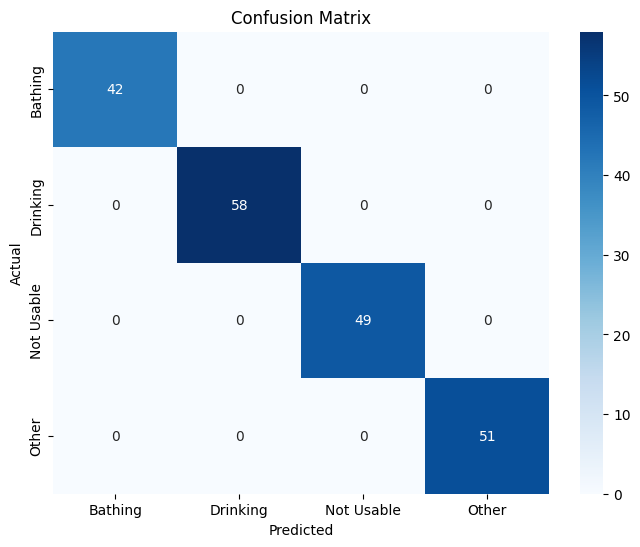

In [ ]:
# Predict and Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔍 Feature Importances:

            Feature  Importance
1         Turbidity    0.241466
6           Nitrate    0.182572
5          Hardness    0.170837
4               TDS    0.141545
7               BOD    0.126651
3      Conductivity    0.067275
2  Dissolved_Oxygen    0.063068
0                pH    0.006586


<ipython-input-13-30483a2f0821>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")
<ipython-input-13-30483a2f0821>:21: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


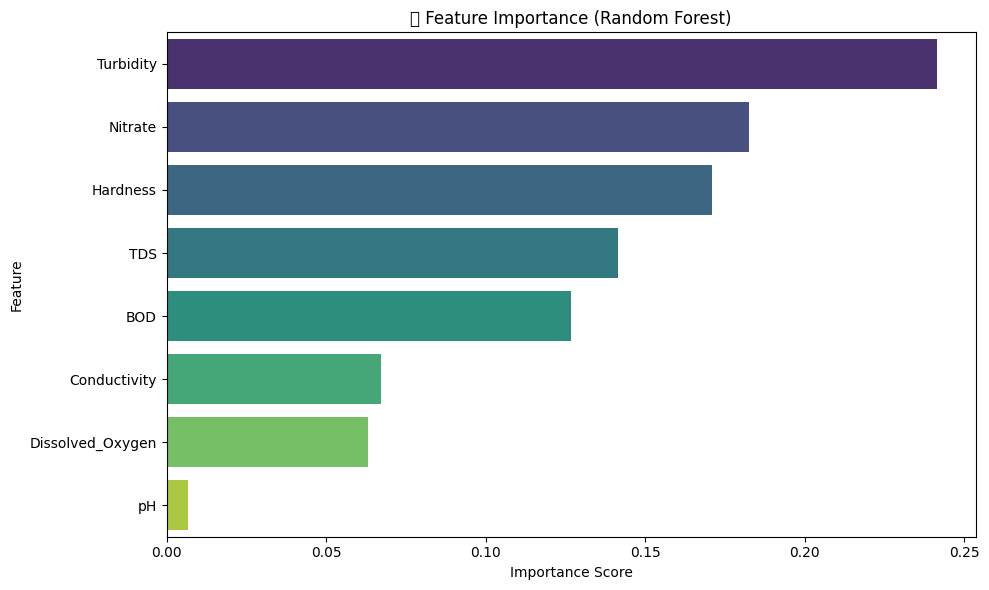

In [ ]:
#  Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print("\n🔍 Feature Importances:\n")
print(feat_imp_df)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")
plt.title("🌟 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
